1. Write a Python function called counts that takes a list as
input and returns a dictionary of unique items in the list as keys and the number of
times each item appears as values. So, the input ['A', 'A', 'B', 'C', 'A']
should have output {'A': 3, 'B': 1, 'C': 1} . Your code should not depend
on any module from the standard library1 or otherwise. You should research
the task first and include a description with references of your algorithm in the
notebook.

In [1]:
def CountFrequency(my_list): 
# Creating an empty dictionary  
    freq = {} 
    
    # loop through each element in the list
    for item in my_list :
        
        #if key not in dictionary
        if item not in freq:
            freq[item] = 1
            
        # if key is in dictionary
        else :
            freq[item] = freq[item] + 1 
    
    # return dictionary
    return freq

In [2]:
# count elements in a list
my_list = ['A', 'A', 'B', 'C', 'A']
CountFrequency(my_list)

{'A': 3, 'B': 1, 'C': 1}

In [3]:
# this function can also be used to count elements in a string
my_name = 'Yalini Brhanavan'
CountFrequency(my_name)

{'Y': 1,
 'a': 4,
 'l': 1,
 'i': 2,
 'n': 3,
 ' ': 1,
 'B': 1,
 'r': 1,
 'h': 1,
 'v': 1}

In [4]:
# can also be used to count elements in a numpy array 
import numpy as np

my_arr = np.array([1,2,4,5,6,1,2,4,7,8,1,6,2,3,1,1])
CountFrequency(my_arr)

{1: 5, 2: 3, 4: 2, 5: 1, 6: 2, 7: 1, 8: 1, 3: 1}

In [5]:
#This is an alternate implemention using the python's collections module, the advatange is speed
# Ref : https://docs.python.org/3.1/library/collections.html
# https://www.geeksforgeeks.org/python-counter-objects-elements/
# https://medium.com/khaliat/the-counter-class-in-python-b8be31d5e4f6

In [6]:
from  collections import Counter

def CountFrequency2(my_list): 
    c = Counter(my_list)
    return dict(c)

In [7]:
CountFrequency2(my_list)

{'A': 3, 'B': 1, 'C': 1}

In [8]:
CountFrequency2(my_name)

{'Y': 1,
 'a': 4,
 'l': 1,
 'i': 2,
 'n': 3,
 ' ': 1,
 'B': 1,
 'r': 1,
 'h': 1,
 'v': 1}

In [9]:
CountFrequency2(my_arr)

{1: 5, 2: 3, 4: 2, 5: 1, 6: 2, 7: 1, 8: 1, 3: 1}

2.Write a Python function called dicerolls that simulates
rolling dice. Your function should take two parameters: the number of dice k and
the number of times to roll the dice n. The function should simulate randomly
rolling k dice n times, keeping track of each total face value. It should then return
a dictionary with the number of times each possible total face value occurred. So,
calling the function as diceroll(k=2, n=1000) should return a dictionary like:
{2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}
You can use any module from the Python standard library you wish and you should
include a description with references of your algorithm in the notebook.

**References:**
* [Numpy documentation - integers method of a default_rng()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers)
* [Simulating randomness using Python’s NumPy random module](https://medium.com/@soumen.atta/simulating-randomness-using-pythons-numpy-random-module-ad96023daee7)
* [Stackoverflow - Sorting a dict by key](https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key)                                  

In [10]:
import numpy as np

def dicerolls(k, n) : 
    # k = number of dice 
    # n = the number of times to roll the dice 
    rng = np.random.default_rng()
    dices = []
    
    for i in range(k):
        dices.append(rng.integers(low=1, high=7, size=n))
    
    total = [0] * n
    for j in range(n) : 
        for die in dices :
            total[j] = total[j] + die[j]
    
    results = CountFrequency(total)
    results = dict(sorted(results.items()))
    return  results 

In [11]:
# get results for rolling 2 dice 1000 times
results = dicerolls(2,1000)
print(results)

{2: 23, 3: 64, 4: 80, 5: 100, 6: 131, 7: 184, 8: 139, 9: 111, 10: 84, 11: 51, 12: 33}


Referene : 
* [Pythonbasics.org - Matplotlib Bar Chart](https://pythonbasics.org/matplotlib-bar-chart/)
* [pyplot documentation](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.bar.html)

In [12]:
import matplotlib.pyplot as plt

def plot_dicerolls(results) : 
    plt.bar(results.keys(), results.values())
    plt.xticks(list(results.keys()))
    plt.xlabel('Dice Total')
    plt.ylabel('Frequency')
    plt.show()

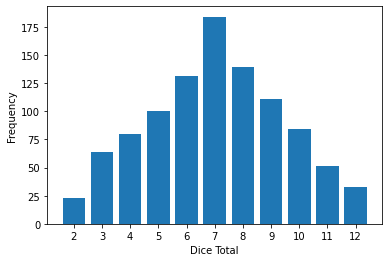

In [13]:
# plot results dictionary
plot_dicerolls(results)

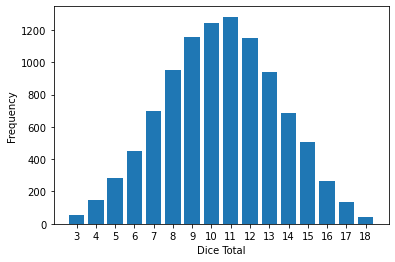

In [14]:
# can do this in one step , for example 3 dice 10,000 times
plot_dicerolls(dicerolls(3,10000))

In [15]:
def dicerolls2(k, n) : 
    # k = number of dice 
    # n = the number of times to roll the dice 
    rng = np.random.default_rng()
    dices = rng.integers(low=1, high=7, size=(k,n))
    
    dice_total = np.sum(dices, axis=0)
 
    results = CountFrequency(dice_total)
    results = dict(sorted(results.items()))
    return  results

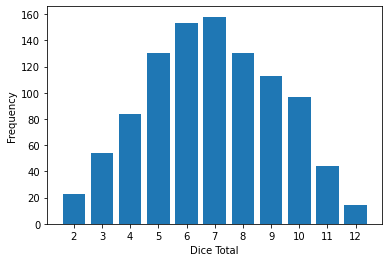

In [16]:
plot_dicerolls(dicerolls2(2,1000))

3.  The numpy.random.binomial function can be used to simulate flipping a coin with a 50/50 chance of heads or tails. Interestingly, if a
coin is flipped many times then the number of heads is well approximated by a
bell-shaped curve. For instance, if we flip a coin 100 times in a row the chance of
getting 50 heads is relatively high, the chances of getting 0 or 100 heads is relatively
low, and the chances of getting any other number of heads decreases as you move
away from 50 in either direction towards 0 or 100. Write some python code that
simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track
of the number of heads in each of the 1,000 simulations. Select an appropriate
plot to depict the resulting list of 1,000 numbers, showing that it roughly follows
a bell-shaped curve. You should explain your work in a Markdown cell above the
code.

In [17]:
# random number generator
rng = np.random.default_rng()

# 100 experimets, the prob of head is 0.5
n = 100 
p = 0.5

In [18]:
# do the experiment once, count the heads
one_trial = rng.binomial(n, p, 1)
print(one_trial)

[53]


In [19]:
# repeat the experiment 1000 times
thousand_trails = rng.binomial(n, p, 1000)

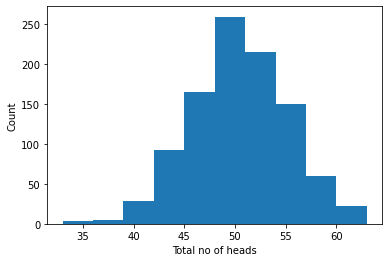

In [22]:
plt.hist(thousand_trails)
plt.xlabel('Total no of heads')
plt.ylabel('Count')
plt.show()